# Algorithm: Gradient Descent with Applications to Linear regression 
## Language: Julia
### Author: Daisy Nsibu

# 1. Introduction

### What is Gradient Descent?

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the jungle in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gra‐dient is zero, you have reached a minimum.

### How does it work?

Concretely, you start by filling θ with random values (this is called random initializa‐tion), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (i.e, the MSE), until the algorithm converges to a minimum

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time and if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before.

**Types of Gradient Descent:**

**1)Stochastic Gradient Descent**
The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (Stochastic Gradient Descent can be implemented as an out-of-core algorithm.)

**2)Mini-batch Gradient Descent**
The next Gradient Descent algorithm I'll look at is called Mini-batch Gradient Descent. It is quite simple to understand once you know Batch and Stochastic Gradi‐ent Descent: at each step, instead of computing the gradients based on the full train‐ing set ,as in Batch Gradient Descent, or based on just one instance (as in Stochastic Gradient Descent), Mini-batch Gradient Descent computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch Gradient Descent over Stochastic Gradient Descent is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

### The Problem

Goal: Find a local min (global) for the function *f(x)*.
Here, f is a smooth real value function and x is some real value vector. Since there are no constraints on the value x, this problem falls under the umbrella of what's known as unconstrained optimization, Minimizing or maximizing a function subject to no constraints on the input vectors.

In general if you look at two dimensional space,
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLaM66KjItFoCwKo-7qjc9TvqvvVtoN11RFw&usqp=CAU)


$$
f(x,y) = 3(X-4)^2 + y^2,
$$




with gradient 

$$\triangledown f(x,y) =
 \begin{bmatrix}
            6(x-4)\\
            2y
           \end{bmatrix}$$


---

### 1.1. Required packages


In [1]:
# Load Packages
using Pkg
using Plots
using Random
using CSV
using DataFrames
using PlotThemes
theme(:juno)

In [8]:
f(x,y) =  3(x-4)^2 + y^2
∇f(x,y) = [6*(x-4), 2y]

∇f (generic function with 1 method)

---

The following code cell plots the 3-dimensional image of $$f(x,y)$$.

---


----


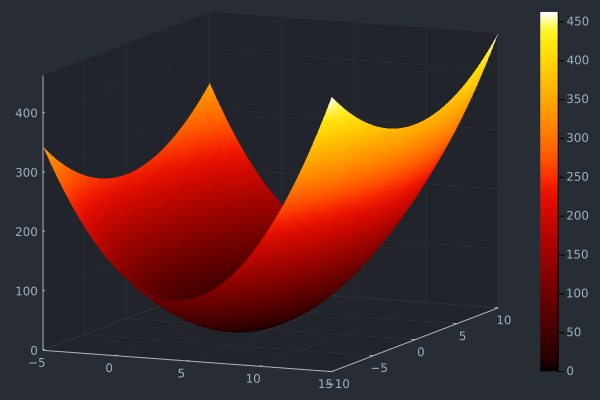

In [9]:
x = -5:0.5:15
y = -10:0.5:10

plot(x, y, f, st =:surface)

We see that there is a global
minimum here that we're going to
try to find.

---

For our learning purposes we will visulaise the contour plot if $f(x,y)$ instead of the 3-dimensuional plot aboove, The following code cell demonstrates how to plot this way.

---

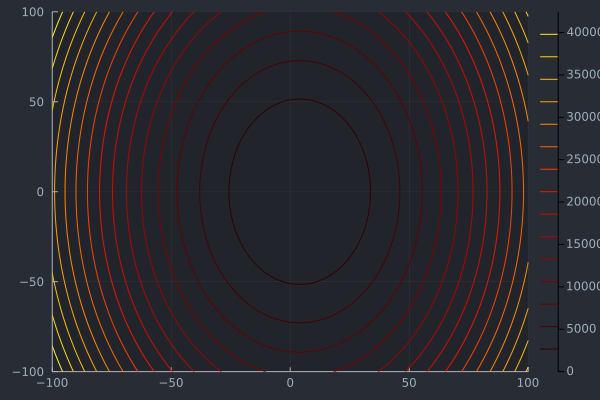

In [10]:
x = -100:0.5:100
y = -100:0.5:100

p1 = contour(x,y,f)

plot(p1, legend=false)

So this is the contour plot of this function, which is basically the projection here. Where the global minimum is in the center and the function is increasing as we go out. We see the values ,in color, change for  different areas of the map.

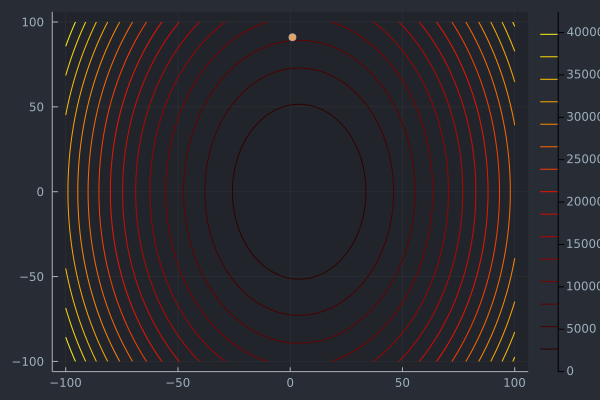

In [11]:
x0 = [-1, 4]# my guess
scatter!([f(x0[1], x0[2])])

# x1 = x0 - 0.02*∇f(x0[1], x0[2])
# scatter!([f(x0[1], x0[2])])

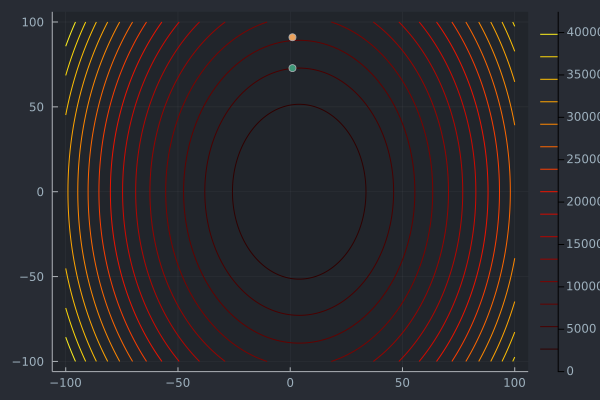

In [12]:
x1 = x0 - 0.02*∇f(x0[1], x0[2])
scatter!([f(x1[1], x1[2])])

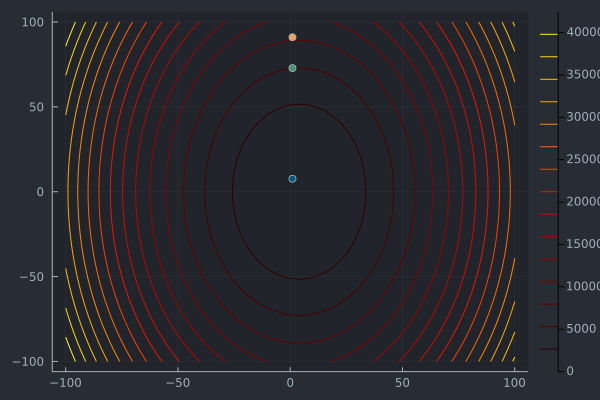

In [13]:
x2 = x1 - 0.2*∇f(x1[1], x1[2])# chnaged the learning rate
scatter!([f(x2[1], x2[2])])

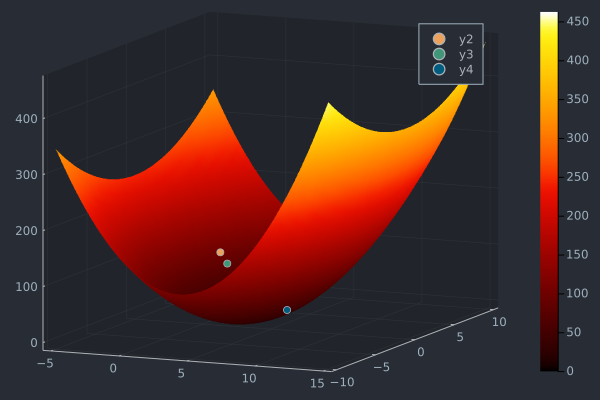

In [14]:
x = -5:0.5:15
y = -10:0.5:10

plot(x, y, f, st =:surface)
scatter!([(x0[1],x0[2], f(x0[1], x0[2]))])
scatter!([(x1[1],x1[2], f(x1[1], x1[2]))])
scatter!([(x2[1],x2[2], f(x2[1], x2[2]))])

We started at the orange dot, we went to the green dot and then
we're at the bottom at the blue dot near the global minimum.

---

# 2. Applications to Linear Regression

---

## 2.1. Loading the Data


In [15]:
data = CSV.read("Advertising.csv", DataFrame) # read in data

,Column1,TV,radio,newspaper,sales
,Int64,Float64,Float64,Float64,Float64
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2
7,7,57.5,32.8,23.5,11.8
8,8,120.2,19.6,11.6,13.2
9,9,8.6,2.1,1.0,4.8


## 2.2. Understanding the data
So this data is sales and amount of money spent on advertising for tv, radios , or newspaper versus the sales that they made for that time frame.

+ 200 data points

In [16]:
# TV ads versus the sales for that given time frame

x_data = data.TV

y_data = data.sales

data_tuples = [x for x in zip(x_data, y_data)]

200-element Array{Tuple{Float64,Float64},1}:
 (230.1, 22.1)
 (44.5, 10.4)
 (17.2, 9.3)
 (151.5, 18.5)
 (180.8, 12.9)
 (8.7, 7.2)
 (57.5, 11.8)
 (120.2, 13.2)
 (8.6, 4.8)
 (199.8, 10.6)
 (66.1, 8.6)
 (214.7, 17.4)
 (23.8, 9.2)
 ⋮
 (286.0, 15.9)
 (18.7, 6.7)
 (39.5, 10.8)
 (75.5, 9.9)
 (17.2, 5.9)
 (166.8, 19.6)
 (149.7, 17.3)
 (38.2, 7.6)
 (94.2, 9.7)
 (177.0, 12.8)
 (283.6, 25.5)
 (232.1, 13.4)

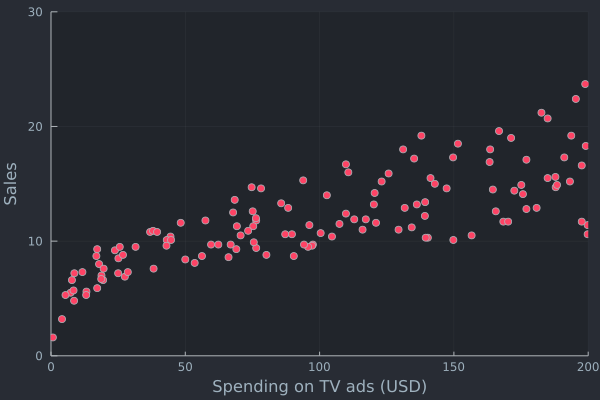

In [17]:
 scatter(data_tuples, xlim = (0,200),  
    ylim = (0,30),
    xaxis = "Spending on TV ads (USD)",
    yaxis = "Sales", legend = false)

**3)Batch Gradient Descent**

To implement Gradient Descent, we need to compute the gradient of the cost func‐tion with regards to each model parameter $θ_j$. In other words, you need to calculate how much the cost function will change if you change $θ_j$ just a little bit.

So, what we want is to find the best line, $$y = wx + b$$ that fits this data the best we can.So we have, 

$$ 
(x_1, y_1),...,(x_n, y_n)
$$ as our points. Where, 

$$ N = 200$$

So the way we can do this is by defining a cost function (error function). Thus, we'll have to look at what's called the 
**mean square error cost function (MSE)**.

We have a slope, w, and an intercept that we need to find, but we don't know the slope and intercept ahead of time but we need to find it. So, the way we are going to do that is by defining a function of w and b, 

 **Let Σ represents the sum of all training examples from i = 1 to N**
$$
MSE(w,b) = \frac{1}{ N} \sum_{i=1}^{N}(y_i - (w*x_i + b))^2
$$



So it's a mean square error because that is averaging over all of them.

$(y_i - (w * x_i + b))^2$ , is the squared error.

It's how far apart our prediction is from the actual label
(the difference or the error being squared). So that's where it gets its name, *mean spauared error*.


 But now we need to minimize this. The way we can do this is by using gradient descent.
 
 What does that look like?
 
 lets let at the partial derivative with respect to w,

 
 $$  \frac{\partial MSE}{\partial w}(w,b) = \frac{1}{N} \sum_{i=1}^{N} 2(y_i - (w*x_i + b))(-x_i) = $$
 
 $$ - \frac{2}{N} \sum_{i=1}^{N}(y_i - (w*x_i + b))(x_i) $$
 
$$ \frac{\partial MSE} {\partial b}(w,b) = - \frac{1}{N} \sum_{i=1}^{N} 2(y_i - (w*x_i + b))$$

 $$w^{(k+1)} =  
 w^k - \alpha * \frac{\partial C }{\partial w} (w^k,b^k)$$
 
  $$b^{(k+1)} =  
  b^k - \alpha * \frac{\partial C}{\partial b} (w^k,b^k)$$

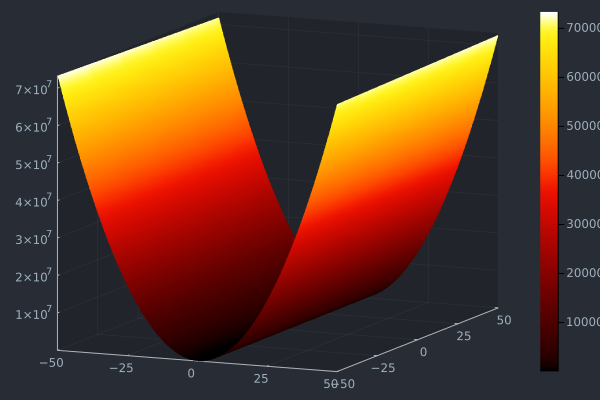

In [18]:
c(w,b) = (1/length(x_data)) * sum([(y_data[i] - (w*x_data[i] + b))^2 for i=1:200])
    
w = -50:0.5:50
    
b = -50:0.5:50
    
plot(w, b, c, st = :surface)

This is a convex function, and they have a global optimal that we can find. so if we apply gradient descent appropriately , we're guarenteed to eventually find the global optimal that will fit the best.

In [19]:
function descent(x_data, y_data, w, b, a)
    N = length(x_data)
    w = w - (-2/N)*a*sum([x_data[i]*(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    b = b - (-2/N)*a*sum([(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    
    return w, b
end

function batch_train(x_data, y_data, w, b, a, epochs)
    N=length(x_data)
    total_error = 0.0
    for i = 1:epochs
        w, b = descent(x_data, y_data, w, b, a)
        
        if i == 1
            println("Epochs: ", i, "with cost: ", c(w,b))
        end
        
        if i == 100
            println("Epochs: ", i, "with cost: ", c(w,b))
        end
        
        if i == 1000
            println("Epochs: ", i, "with cost: ", c(w,b))
        end
        
        if i == 10000
            println("Epochs: ", i, "with cost: ", c(w,b))
        end
        
        if i == 100000
            println("Epochs: ", i, "with cost: ", c(w,b))
        end
    end
        
    return w, b
end
    

batch_train (generic function with 1 method)

Epochs: 1with cost: 58.586909599170966


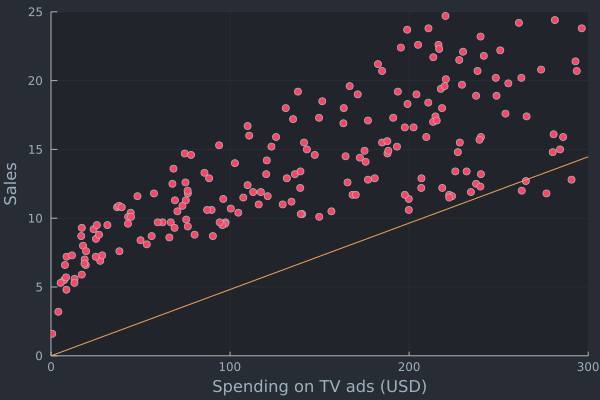

In [20]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 1)

scatter(data_tuples, xlim = (0,300),  
    ylim = (0,25),
    xaxis = "Spending on TV ads (USD)",
    yaxis = "Sales", legend = false)

plot!(x-> x*w + b, xlim = (0,300),
ylim = (0,25),
legend = false)

Epochs: 1with cost: 58.586909599170966
Epochs: 100with cost: 23.026278283646004


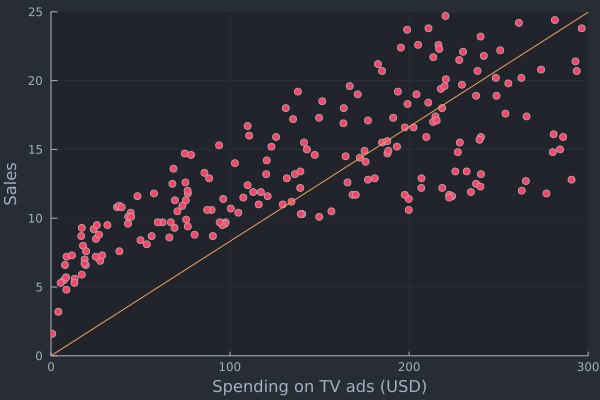

In [21]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 100)

scatter(data_tuples, xlim = (0,300),  
    ylim = (0,25),
    xaxis = "Spending on TV ads (USD)",
    yaxis = "Sales", legend = false)

plot!(x-> x*w + b, xlim = (0,300),
ylim = (0,25),
legend = false)

Epochs: 1with cost: 58.586909599170966
Epochs: 100with cost: 23.026278283646004
Epochs: 1000with cost: 22.912694162324474


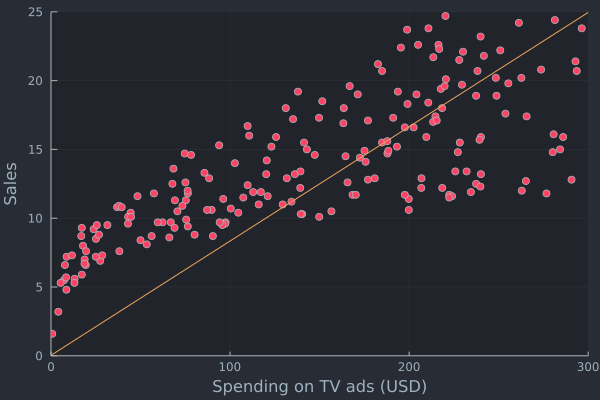

In [22]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 1000)

scatter(data_tuples, xlim = (0,300),  
    ylim = (0,25),
    xaxis = "Spending on TV ads (USD)",
    yaxis = "Sales", legend = false)

plot!(x-> x*w + b, xlim = (0,300),
ylim = (0,25),
legend = false)

Epochs: 1with cost: 58.586909599170966
Epochs: 100with cost: 23.026278283646004
Epochs: 1000with cost: 22.912694162324474
Epochs: 10000with cost: 21.83204068666527


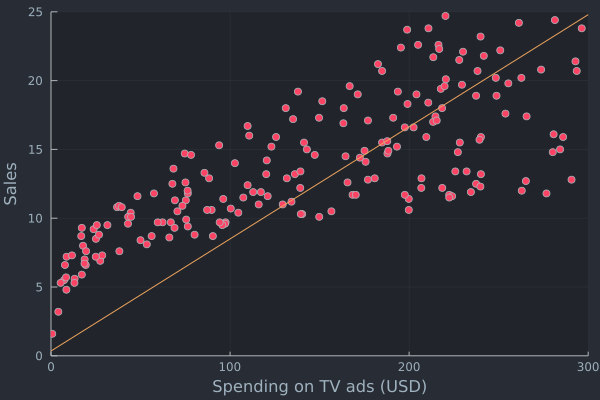

In [23]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 10000)

scatter(data_tuples, xlim = (0,300),  
    ylim = (0,25),
    xaxis = "Spending on TV ads (USD)",
    yaxis = "Sales", legend = false)

plot!(x-> x*w + b, xlim = (0,300),
ylim = (0,25),
legend = false)

The lower the cost the better fitting this line is to the data.
So at 10,000 epochs it takes a second to run. We have to calculate the partial derivative with respect to w and b for every single one of these points. But this is not ideal, so what we can do is use something called **stochastic gradient desent**.

In [24]:
function stochastic_descent(x_data, y_data, w, b, a)
    N = length(x_data)
    
    i = rand([k for k = 1:N])
    # we are only picking one data point (randomly) to evaluate at 
    # calculating the partial derivative at that one point and excluding all others
    w = w - (-2/N)*a*([x_data[i]*(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    b = b - (-2/N)*a*([(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    
    return w, b
end

function stochastic_train(x_data, y_data, w, b, a, epochs)
    N=length(x_data)
    total_error = 0.0
    for i = 1:epochs
        w, b = descent(x_data, y_data, w, b, a)
        
        if i == 1
            println("Epochs: ", i, "with cost: ", c(w,b))
        end
        
        if i == 100
            println("Epochs: ", i, "with cost: ", c(w,b))
        end
        
        if i == 1000
            println("Epochs: ", i, "with cost: ", c(w,b))
        end
        
        if i == 10000
            println("Epochs: ", i, "with cost: ", c(w,b))
        end
        
        if i == 100000
            println("Epochs: ", i, "with cost: ", c(w,b))
        end
    end
        
    return w, b
end
    

stochastic_train (generic function with 1 method)

Epochs: 1with cost: 58.586909599170966
Epochs: 100with cost: 23.026278283646004
Epochs: 1000with cost: 22.912694162324474
Epochs: 10000with cost: 21.83204068666527


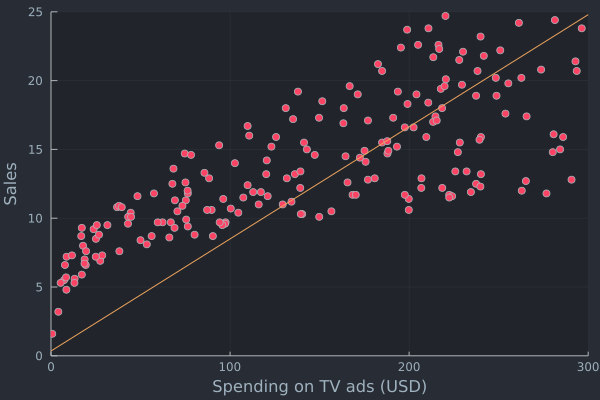

In [25]:
w, b = stochastic_train(x_data, y_data, 0.0, 0.0, 0.00001, 10000)

scatter(data_tuples, xlim = (0,300),  
    ylim = (0,25),
    xaxis = "Spending on TV ads (USD)",
    yaxis = "Sales", legend = false)

plot!(x-> x*w + b, xlim = (0,300),
ylim = (0,25),
legend = false)

----
# Salary Data
----

### Load Dataset

In [26]:
# read in data
data = CSV.read("Salary_Data.csv", DataFrame) 
size(data) # 30x2

(30, 2)

In [27]:
names(data)

2-element Array{String,1}:
 "Experience"
 "Salary"

The salary for Software Developer  employees in were collected
and  made available to the public for the data analysis.
This particular can be found here. [dataset](https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression). The  dataset consists of 30 rows and 2 columns. The following columns and corresponding descriptions are included in the data: 

  * `Experience`= Experience, in years
  * `Salary` = Salary

In [28]:
# Experience versus the salary for a given employee

x_data = data.Experience

y_data = data.Salary

data_tuples = [x for x in zip(x_data, y_data)]

30-element Array{Tuple{Float64,Int64},1}:
 (1.1, 39343)
 (1.3, 46205)
 (1.5, 37731)
 (2.0, 43525)
 (2.2, 39891)
 (2.9, 56642)
 (3.0, 60150)
 (3.2, 54445)
 (3.2, 64445)
 (3.7, 57189)
 (3.9, 63218)
 (4.0, 55794)
 (4.0, 56957)
 ⋮
 (5.9, 81363)
 (6.0, 93940)
 (6.8, 91738)
 (7.1, 98273)
 (7.9, 101302)
 (8.2, 113812)
 (8.7, 109431)
 (9.0, 105582)
 (9.5, 116969)
 (9.6, 112635)
 (10.3, 122391)
 (10.5, 121872)

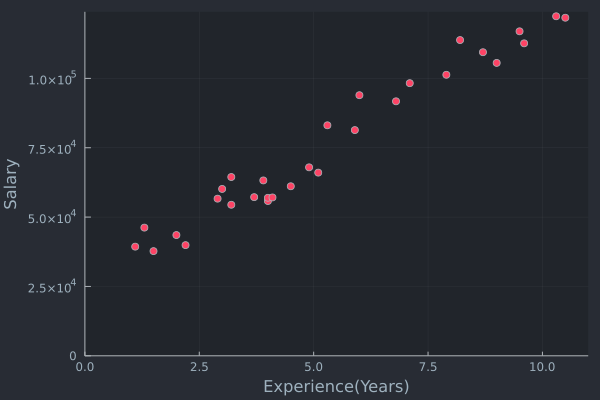

In [29]:
 scatter(data_tuples, xlim = (0,11),  
    ylim = (0,124000),
    xaxis = "Experience(Years)",
    yaxis = "Salary", legend = false)

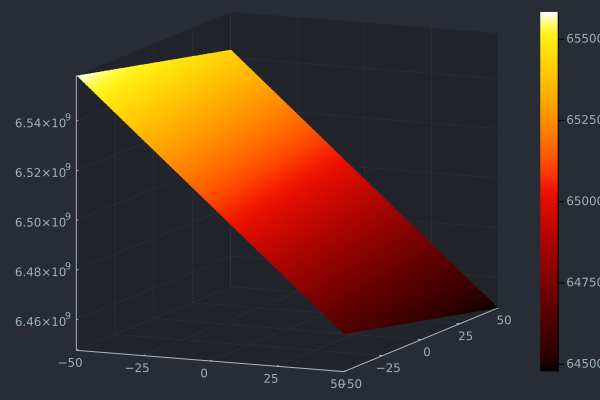

In [30]:
c(w,b) = (1/length(x_data)) * sum([(y_data[i] - (w*x_data[i] + b))^2 for i=1:30])
    
w = -50:0.5:50
    
b = -50:0.5:50
    
plot(w, b, c, st = :surface)

Epochs: 1with cost: 6.493611425823637e9


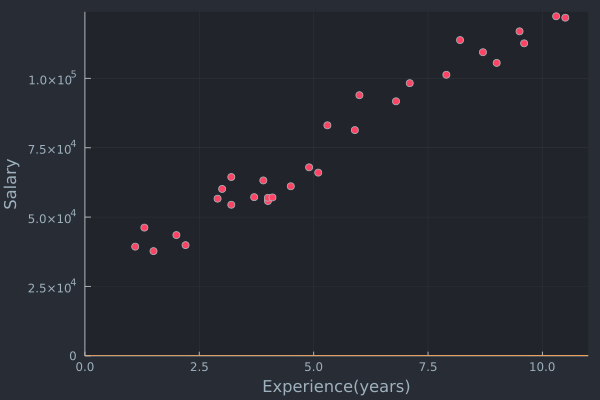

In [31]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 1)

scatter(data_tuples, xlim = (0,11),  
    ylim = (0,124000),
    xaxis = "Experience(years)",
    yaxis = "Salary", legend = false)

plot!(x-> x*w + b, xlim = (0,11),
ylim = (0,124000),
legend = false)

Epochs: 1with cost: 6.493611425823637e9
Epochs: 100with cost: 5.633471371569068e9


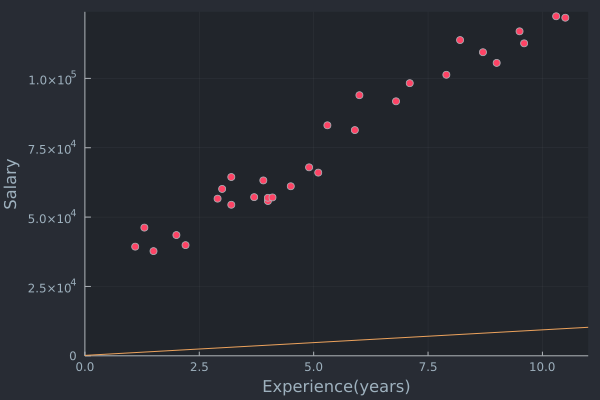

In [32]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 100)

scatter(data_tuples, xlim = (0,11),  
    ylim = (0,124000),
    xaxis = "Experience(years)",
    yaxis = "Salary", legend = false)

plot!(x-> x*w + b, xlim = (0,11),
ylim = (0,124000),
legend = false)

Epochs: 1with cost: 6.493611425823637e9
Epochs: 100with cost: 5.633471371569068e9
Epochs: 1000with cost: 1.6090827056383448e9


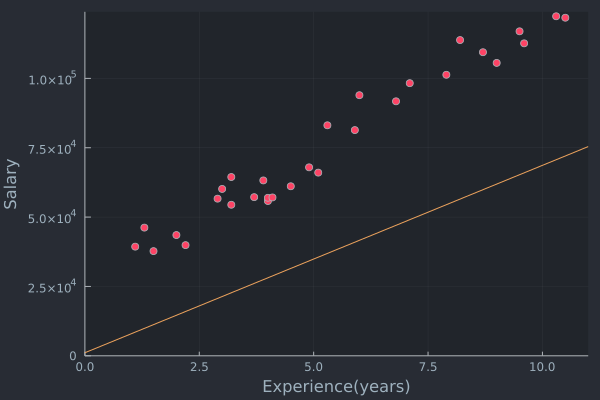

In [33]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 1000)

scatter(data_tuples, xlim = (0,11),  
    ylim = (0,124000),
    xaxis = "Experience(years)",
    yaxis = "Salary", legend = false)

plot!(x-> x*w + b, xlim = (0,11),
ylim = (0,124000),
legend = false)

Epochs: 1with cost: 6.493611425823637e9
Epochs: 100with cost: 5.633471371569068e9
Epochs: 1000with cost: 1.6090827056383448e9
Epochs: 10000with cost: 1.4441475896033666e8


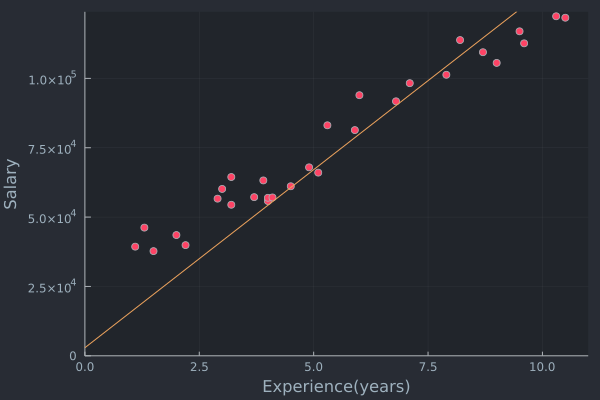

In [34]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 10000)

scatter(data_tuples, xlim = (0,11),  
    ylim = (0,124000),
    xaxis = "Experience(years)",
    yaxis = "Salary", legend = false)

plot!(x-> x*w + b, xlim = (0,11),
ylim = (0,124000),
legend = false)

Epochs: 1with cost: 6.493611425823637e9
Epochs: 100with cost: 5.633471371569068e9
Epochs: 1000with cost: 1.6090827056383448e9
Epochs: 10000with cost: 1.4441475896033666e8


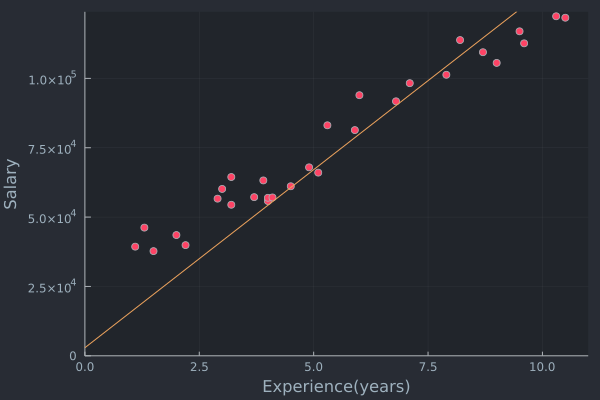

In [35]:
w, b = stochastic_train(x_data, y_data, 0.0, 0.0, 0.00001, 10000)

scatter(data_tuples, xlim = (0,11),  
    ylim = (0,124000),
    xaxis = "Experience(years)",
    yaxis = "Salary", legend = false)

plot!(x-> x*w + b, xlim = (0,11),
ylim = (0,124000),
legend = false)

# Conclusion

After using two datasets with the batch gradient descent algorithm and stochastic gradient descent algorithm, we can see how much faster the stochastic gradient descent algorithm even on the larger advertising data. For the futher, It would be great to see how both algorithms compare to the mini batch gradient descent algorithm and how much closer it gets to the minimum or if it reaches it at all.  

# References

Géron, Aurélien. *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*. 2nd ed., O’Reilly Media, 2019.